In [1]:
import pandas as pd
import numpy as np

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

import joblib

from data_preprocessing import pipeline
from feature_preprocessing import pipeline2

In [2]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

### 데이터 전처리

In [3]:
# 로우 데이터 불러오기
file_path = "./storage/raw_data/병합_청약매물_목록_정보_픽스2.csv"
# df = pd.read_csv(file_path, encoding ='cp949')
df = pd.read_csv(file_path)

# 데이터 전처리````
preprocessing_pipeline = pipeline(type='train')
df = preprocessing_pipeline.transform(df)

# 파일 저장
file_version = "시세차익있는최종트레인3"
output_file = f"./storage/train_data/train-{file_version}.csv"
df.to_csv(output_file, index=False, encoding='cp949')

C:\Users\user\AppData\Local\Temp\ipykernel_21788\368785412.py:4: DtypeWarning: Columns (48) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
c:\Users\user\mid_project\src\data_preprocessing.py:146: DtypeWarning: Columns (36,48) have mixed types. Specify dtype option on import or set low_memory=False.
  df_estate_price = pd.read_csv(csv_path, encoding="cp949")
c:\Users\user\mid_project\src\data_preprocessing.py:328: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['최고당첨가점']

In [ ]:
# df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2981 entries, 44 to 17246
Data columns (total 27 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   공급지역코드        2981 non-null   int64  
 1   공급규모          2981 non-null   int64  
 2   투기과열지구        2981 non-null   object 
 3   조정대상지역        2981 non-null   object 
 4   분양가상한제        2981 non-null   object 
 5   정비사업          2981 non-null   object 
 6   공공주택지구        2981 non-null   object 
 7   대규모택지개발지구     2981 non-null   object 
 8   수도권내민영공공주택지구  2981 non-null   object 
 9   공급세대수         2981 non-null   int64  
 10  순위            2981 non-null   object 
 11  거주지역          2981 non-null   object 
 12  접수건수          2981 non-null   int64  
 13  경쟁률           2981 non-null   float64
 14  최저당첨가점        2981 non-null   float64
 15  토픽 1          2981 non-null   float64
 16  토픽 2          2981 non-null   float64
 17  토픽 3          2981 non-null   float64
 18  토픽 4          2981 non-null   f

### 모델 학습 및 평가

In [47]:
from sklearn.model_selection import GridSearchCV

# 전처리된 데이터 가져오기
df = pd.read_csv("./storage/train_data/train-시세차익있는최종트레인3.csv", encoding = 'cp949')

X = df.drop(columns=["최고당첨가점"])
Y = df["최고당첨가점"]

X_train, X_test, y_train, y_test = train_test_split(
    X,  # 타겟(최고당첨가점) 제외
    Y,  # 타겟
    test_size=0.2,
    random_state=42
)

feature_pipeline = pipeline2()

# 학습 데이터(X_train)에 fit
feature_pipeline.fit(X_train)

# 학습 데이터(X_train)를 변환
X_train_transformed = feature_pipeline.transform(X_train)

# 테스트 데이터(X_test)를 변환
X_test_transformed = feature_pipeline.transform(X_test)



Index(['공급지역코드', '공급규모', '투기과열지구', '조정대상지역', '분양가상한제', '정비사업', '공공주택지구',
       '대규모택지개발지구', '수도권내민영공공주택지구', '공급세대수', '순위', '거주지역', '접수건수', '경쟁률',
       '토픽 1', '토픽 2', '토픽 3', '토픽 4', '토픽 5', '토픽 6', '토픽 7', '전용면적',
       '공급금액(최고가 기준)', '법정동코드', '거래금액(만원)', '전용면적당 시세차익'],
      dtype='object')
Index(['공급규모', '공급세대수', '접수건수', '경쟁률', '토픽 1', '토픽 2', '토픽 3', '토픽 4', '토픽 5',
       '토픽 6', '토픽 7', '전용면적', '공급금액(최고가 기준)', '법정동코드', '거래금액(만원)',
       '전용면적당 시세차익', '투기과열지구_N', '투기과열지구_Y', '조정대상지역_N', '조정대상지역_Y',
       '분양가상한제_N', '분양가상한제_Y', '정비사업_N', '정비사업_Y', '공공주택지구_N', '공공주택지구_Y',
       '대규모택지개발지구_N', '대규모택지개발지구_Y', '거주지역_기타지역', '거주지역_해당지역', '공급지역코드_100',
       '공급지역코드_400', '공급지역코드_410', '수도권내민영공공주택지구_N', '수도권내민영공공주택지구_Y',
       '순위_1순위'],
      dtype='object')
⚠️ Warning: 새로운 법정동코드 발견 {'4111514000.0', '4125010300.0', '4143011000.0', '4139012700.0', '1156011000.0', '4148025327.0', '4137012200.0'}. 'unknown'으로 대체합니다.
Index(['공급지역코드', '공급규모', '투기과열지구', '조정대상지역', '분양가상한제', '정비사업', '

c:\Users\user\anaconda3\envs\project-env\Lib\site-packages\sklearn\pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(
c:\Users\user\anaconda3\envs\project-env\Lib\site-packages\sklearn\pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


### RandomForeset Regressor

In [35]:
# 랜덤포레스트회귀모델

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

rf_model = RandomForestRegressor()
rf_param_grid = {
    'n_estimators': [100, 500, 1000],
    'max_depth': [10, 30, 50],
    'max_features': [6, 8, 10, 12, 14, 16],
    'min_samples_leaf': [8, 12, 18],
    'min_samples_split': [8, 16, 20]
}
rf_grid_search = GridSearchCV(rf_model, rf_param_grid, cv=5)
rf_grid_search.fit(X_train_transformed, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [10, 30, 50],
                         'max_features': [6, 8, 10, 12, 14, 16],
                         'min_samples_leaf': [8, 12, 18],
                         'min_samples_split': [8, 16, 20],
                         'n_estimators': [100, 500, 1000]})

Random Forest - RMSE: 6.113928584960135, R^2: 0.6567352355692204
Feature Importance:
공급규모: 0.0367
공급세대수: 0.0865
접수건수: 0.4400
경쟁률: 0.1526
토픽 1: 0.0133
토픽 2: 0.0152
토픽 3: 0.0131
토픽 4: 0.0233
토픽 5: 0.0153
토픽 6: 0.0118
토픽 7: 0.0136
전용면적: 0.0229
공급금액(최고가 기준): 0.0340
법정동코드: 0.0174
거래금액(만원): 0.0402
전용면적당 시세차익: 0.0228
투기과열지구_N: 0.0007
투기과열지구_Y: 0.0009
조정대상지역_N: 0.0017
조정대상지역_Y: 0.0017
분양가상한제_N: 0.0010
분양가상한제_Y: 0.0010
정비사업_N: 0.0097
정비사업_Y: 0.0090
공공주택지구_N: 0.0016
공공주택지구_Y: 0.0015
대규모택지개발지구_N: 0.0024
대규모택지개발지구_Y: 0.0027
거주지역_기타지역: 0.0006
거주지역_해당지역: 0.0007
공급지역코드_100: 0.0013
공급지역코드_400: 0.0026
공급지역코드_410: 0.0011
수도권내민영공공주택지구_N: 0.0002
수도권내민영공공주택지구_Y: 0.0003
순위_1순위: 0.0000


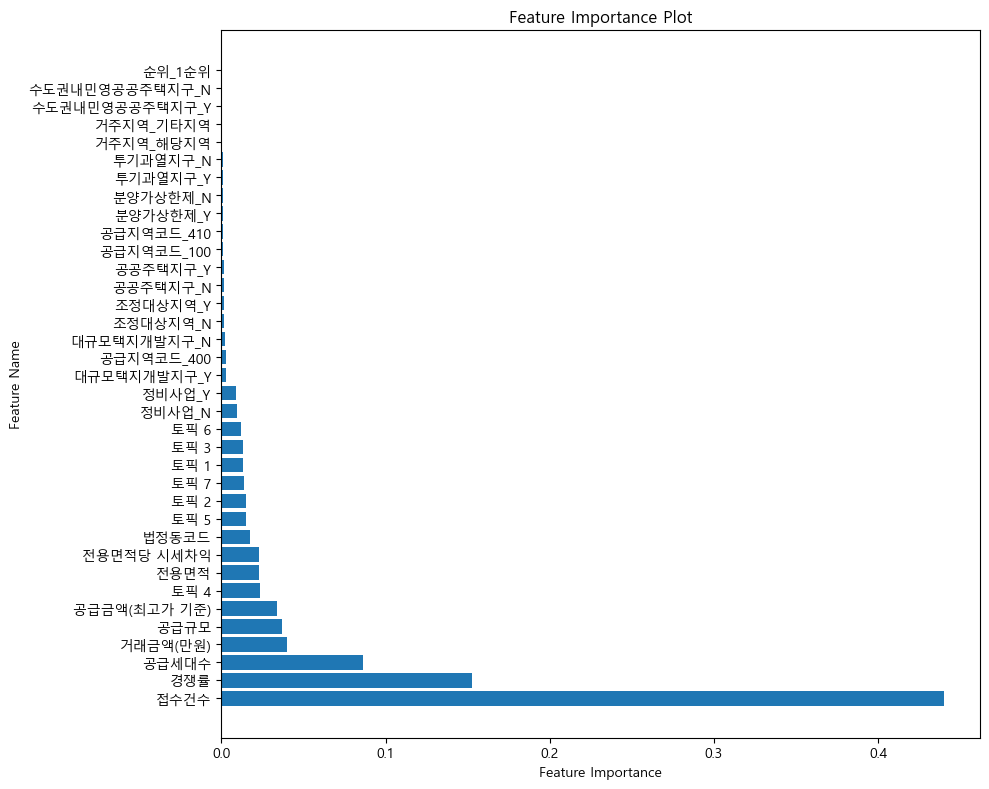

In [48]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# 랜덤 포레스트 회귀 모델 생성 및 학습
rf_model = RandomForestRegressor(max_depth=50, max_features=16, min_samples_leaf=8,
                      min_samples_split=16, n_estimators=1000)


rf_model.fit(X_train_transformed, y_train)

y_pred_rf = rf_model.predict(X_test_transformed)

# RMSE와 R^2 계산 함수
def evaluate_model(y_true, y_pred):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    return rmse, r2

rmse_rf, r2_rf = evaluate_model(y_test, y_pred_rf)
print(f"Random Forest - RMSE: {rmse_rf}, R^2: {r2_rf}")

# Feature Importance 평균 계산 및 출력
# 랜덤 포레스트 모델의 feature_importances_ 속성을 사용
feature_importances = rf_model.feature_importances_

print("Feature Importance:")
for i, col in enumerate(X_train_transformed.columns):
    print(f"{col}: {feature_importances[i]:.4f}")

# Feature Importance 시각화
sorted_idx = np.argsort(feature_importances)[::-1]

plt.figure(figsize=(10, 8))  # 그래프 크기 설정
plt.barh(X_train_transformed.columns[sorted_idx], feature_importances[sorted_idx])
plt.xlabel("Feature Importance")
plt.ylabel("Feature Name")
plt.title("Feature Importance Plot")
plt.tight_layout()  # 레이아웃 조정
plt.show()

In [41]:
X_train_transformed.drop(['순위_1순위', '수도권내민영공공주택지구_N', '수도권내민영공공주택지구_Y', '거주지역_해당지역', '거주지역_기타지역', '투기과열지구_Y', '투기과열지구_N', '분양가상한제_Y', '공급지역코드_100', '공공주택지구_N', '조정대상지역_Y', '공공주택지구_Y', '조정대상지역_N', '대규모택지개발지구_N', '공급지역코드_400', '대규모택지개발지구_Y', '공급지역코드_410', '분양가상한제_N'], axis=1, inplace=True)
X_test_transformed.drop(['순위_1순위', '수도권내민영공공주택지구_N', '수도권내민영공공주택지구_Y', '거주지역_해당지역', '거주지역_기타지역', '투기과열지구_Y', '투기과열지구_N', '분양가상한제_Y', '공급지역코드_100', '공공주택지구_N', '조정대상지역_Y', '공공주택지구_Y', '조정대상지역_N', '대규모택지개발지구_N', '공급지역코드_400', '대규모택지개발지구_Y', '공급지역코드_410', '분양가상한제_N'], axis=1, inplace=True)


Random Forest - RMSE: 6.140576078058465, R^2: 0.6537364830708783
Feature Importance:
공급규모: 0.0178
공급세대수: 0.0290
접수건수: 0.6425
경쟁률: 0.0602
토픽 1: 0.0150
토픽 2: 0.0124
토픽 3: 0.0152
토픽 4: 0.0157
토픽 5: 0.0149
토픽 6: 0.0120
토픽 7: 0.0154
전용면적: 0.0215
공급금액(최고가 기준): 0.0496
법정동코드: 0.0229
거래금액(만원): 0.0264
전용면적당 시세차익: 0.0192
정비사업_N: 0.0052
정비사업_Y: 0.0051


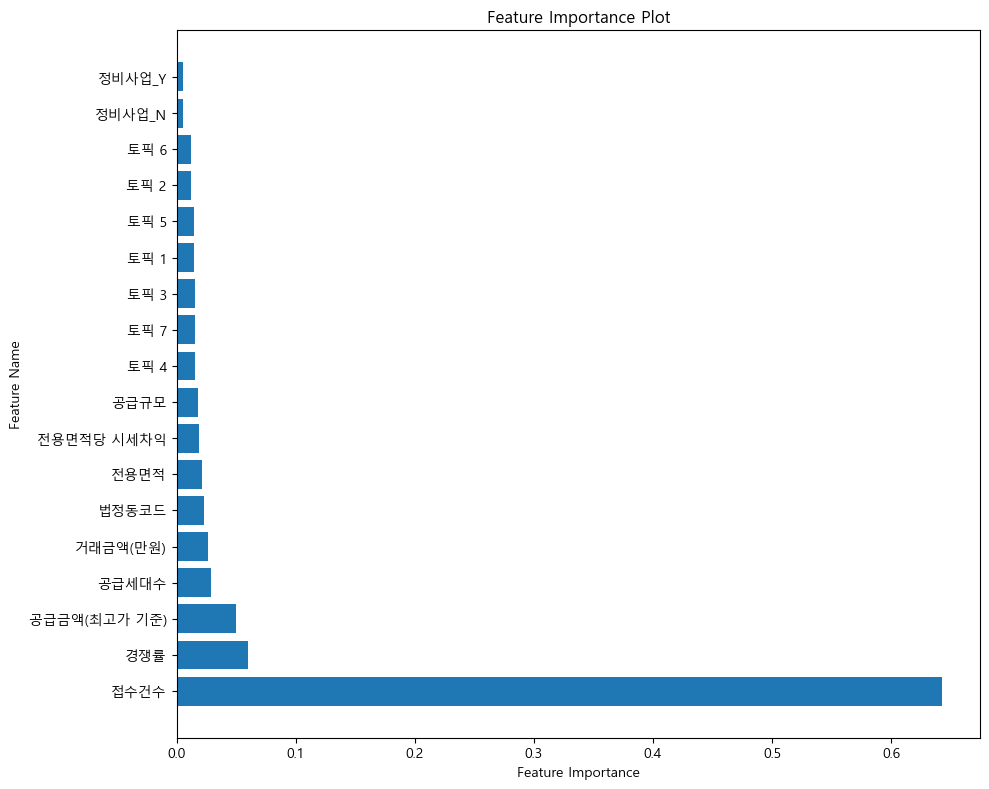

In [42]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# 랜덤 포레스트 회귀 모델 생성 및 학습
rf_model = RandomForestRegressor(max_depth=50, max_features=16, min_samples_leaf=8,
                      min_samples_split=16, n_estimators=1000)


rf_model.fit(X_train_transformed, y_train)

y_pred_rf = rf_model.predict(X_test_transformed)

# RMSE와 R^2 계산 함수
def evaluate_model(y_true, y_pred):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    return rmse, r2

rmse_rf, r2_rf = evaluate_model(y_test, y_pred_rf)
print(f"Random Forest - RMSE: {rmse_rf}, R^2: {r2_rf}")

# Feature Importance 평균 계산 및 출력
# 랜덤 포레스트 모델의 feature_importances_ 속성을 사용
feature_importances = rf_model.feature_importances_

print("Feature Importance:")
for i, col in enumerate(X_train_transformed.columns):
    print(f"{col}: {feature_importances[i]:.4f}")

# Feature Importance 시각화
sorted_idx = np.argsort(feature_importances)[::-1]

plt.figure(figsize=(10, 8))  # 그래프 크기 설정
plt.barh(X_train_transformed.columns[sorted_idx], feature_importances[sorted_idx])
plt.xlabel("Feature Importance")
plt.ylabel("Feature Name")
plt.title("Feature Importance Plot")
plt.tight_layout()  # 레이아웃 조정
plt.show()

In [45]:
X_train_transformed.drop(['순위_1순위', '수도권내민영공공주택지구_N', '수도권내민영공공주택지구_Y', '거주지역_해당지역', '거주지역_기타지역', '투기과열지구_Y', '투기과열지구_N', '분양가상한제_Y', '공급지역코드_100', '공공주택지구_N', '조정대상지역_Y', '공공주택지구_Y', '조정대상지역_N', '대규모택지개발지구_N', '공급지역코드_400', '대규모택지개발지구_Y', '공급지역코드_410', '분양가상한제_N', '정비사업_Y', '정비사업_N'], axis=1, inplace=True)
X_test_transformed.drop(['순위_1순위', '수도권내민영공공주택지구_N', '수도권내민영공공주택지구_Y', '거주지역_해당지역', '거주지역_기타지역', '투기과열지구_Y', '투기과열지구_N', '분양가상한제_Y', '공급지역코드_100', '공공주택지구_N', '조정대상지역_Y', '공공주택지구_Y', '조정대상지역_N', '대규모택지개발지구_N', '공급지역코드_400', '대규모택지개발지구_Y', '공급지역코드_410', '분양가상한제_N', '정비사업_Y', '정비사업_N'], axis=1, inplace=True)


Random Forest - RMSE: 6.176823648522353, R^2: 0.6496364586714543
Feature Importance:
공급규모: 0.0164
공급세대수: 0.0103
접수건수: 0.6952
경쟁률: 0.0261
토픽 1: 0.0157
토픽 2: 0.0129
토픽 3: 0.0162
토픽 4: 0.0149
토픽 5: 0.0149
토픽 6: 0.0115
토픽 7: 0.0154
전용면적: 0.0218
공급금액(최고가 기준): 0.0547
법정동코드: 0.0279
거래금액(만원): 0.0262
전용면적당 시세차익: 0.0199


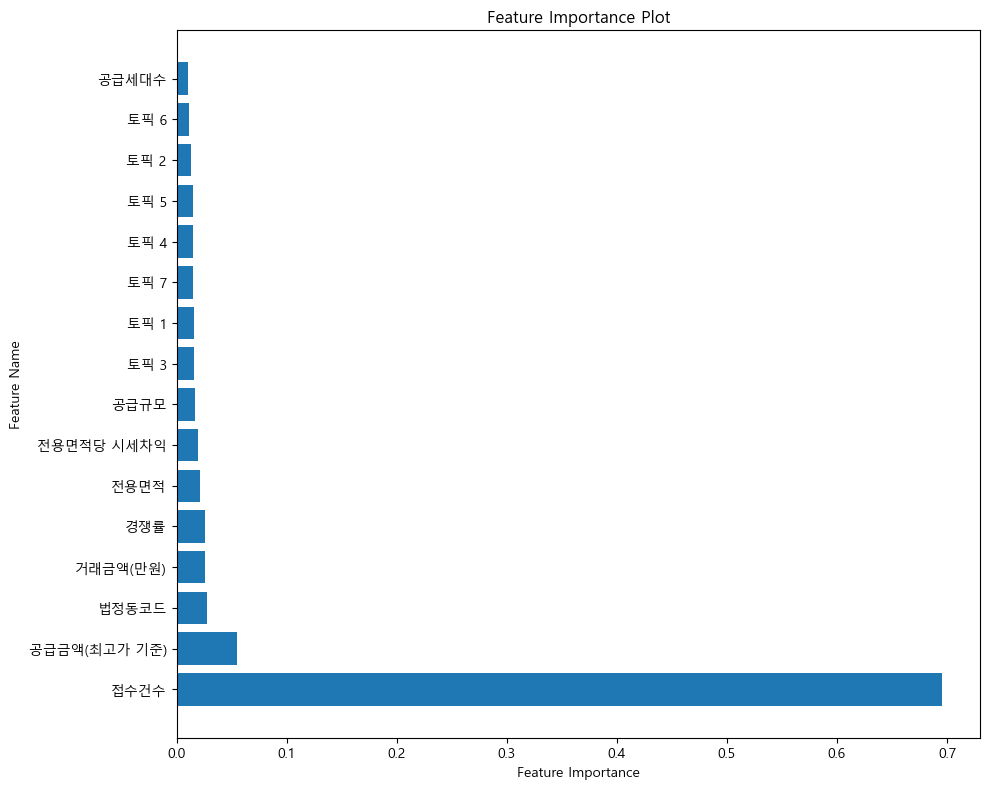

In [46]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# 랜덤 포레스트 회귀 모델 생성 및 학습
rf_model = RandomForestRegressor(max_depth=50, max_features=16, min_samples_leaf=8,
                      min_samples_split=16, n_estimators=1000)


rf_model.fit(X_train_transformed, y_train)

y_pred_rf = rf_model.predict(X_test_transformed)

# RMSE와 R^2 계산 함수
def evaluate_model(y_true, y_pred):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    return rmse, r2

rmse_rf, r2_rf = evaluate_model(y_test, y_pred_rf)
print(f"Random Forest - RMSE: {rmse_rf}, R^2: {r2_rf}")

# Feature Importance 평균 계산 및 출력
# 랜덤 포레스트 모델의 feature_importances_ 속성을 사용
feature_importances = rf_model.feature_importances_

print("Feature Importance:")
for i, col in enumerate(X_train_transformed.columns):
    print(f"{col}: {feature_importances[i]:.4f}")

# Feature Importance 시각화
sorted_idx = np.argsort(feature_importances)[::-1]

plt.figure(figsize=(10, 8))  # 그래프 크기 설정
plt.barh(X_train_transformed.columns[sorted_idx], feature_importances[sorted_idx])
plt.xlabel("Feature Importance")
plt.ylabel("Feature Name")
plt.title("Feature Importance Plot")
plt.tight_layout()  # 레이아웃 조정
plt.show()

### XGBoost

In [31]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

# 전처리된 데이터 가져오기
df = pd.read_csv("./storage/train_data/train-시세차익있는최종트레인3.csv", encoding = 'cp949')

X = df.drop(columns=["최고당첨가점"])
Y = df["최고당첨가점"]

X_train, X_test, y_train, y_test = train_test_split(
    X,  # 타겟(최고당첨가점) 제외
    Y,  # 타겟
    test_size=0.2,
    random_state=42
)

feature_pipeline = pipeline2()

# 학습 데이터(X_train)에 fit
feature_pipeline.fit(X_train)

# 학습 데이터(X_train)를 변환
X_train_transformed = feature_pipeline.transform(X_train)

# 테스트 데이터(X_test)를 변환
X_test_transformed = feature_pipeline.transform(X_test)




Index(['공급지역코드', '공급규모', '투기과열지구', '조정대상지역', '분양가상한제', '정비사업', '공공주택지구',
       '대규모택지개발지구', '수도권내민영공공주택지구', '공급세대수', '순위', '거주지역', '접수건수', '경쟁률',
       '토픽 1', '토픽 2', '토픽 3', '토픽 4', '토픽 5', '토픽 6', '토픽 7', '전용면적',
       '공급금액(최고가 기준)', '법정동코드', '거래금액(만원)', '전용면적당 시세차익'],
      dtype='object')
Index(['공급규모', '공급세대수', '접수건수', '경쟁률', '토픽 1', '토픽 2', '토픽 3', '토픽 4', '토픽 5',
       '토픽 6', '토픽 7', '전용면적', '공급금액(최고가 기준)', '법정동코드', '거래금액(만원)',
       '전용면적당 시세차익', '투기과열지구_N', '투기과열지구_Y', '조정대상지역_N', '조정대상지역_Y',
       '분양가상한제_N', '분양가상한제_Y', '정비사업_N', '정비사업_Y', '공공주택지구_N', '공공주택지구_Y',
       '대규모택지개발지구_N', '대규모택지개발지구_Y', '거주지역_기타지역', '거주지역_해당지역', '공급지역코드_100',
       '공급지역코드_400', '공급지역코드_410', '수도권내민영공공주택지구_N', '수도권내민영공공주택지구_Y',
       '순위_1순위'],
      dtype='object')
⚠️ Warning: 새로운 법정동코드 발견 {'4111514000.0', '4125010300.0', '4143011000.0', '4139012700.0', '1156011000.0', '4148025327.0', '4137012200.0'}. 'unknown'으로 대체합니다.
Index(['공급지역코드', '공급규모', '투기과열지구', '조정대상지역', '분양가상한제', '정비사업', '

c:\Users\user\anaconda3\envs\project-env\Lib\site-packages\sklearn\pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(
c:\Users\user\anaconda3\envs\project-env\Lib\site-packages\sklearn\pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


In [20]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# XGBoost 모델 생성
xgb_model = xgb.XGBRegressor(objective='reg:squarederror')

# Grid Search 파라미터 설정
xgb_param_grid = {
    'n_estimators': [100, 500, 1000],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
}

# Grid Search 수행
xgb_grid_search = GridSearchCV(xgb_model, xgb_param_grid, cv=5)
xgb_grid_search.fit(X_train_transformed, y_train)

# 최적 모델 예측
y_pred_xgb = xgb_grid_search.predict(X_test_transformed)

# RMSE와 R^2 계산 함수
def evaluate_model(y_true, y_pred):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    return rmse, r2

# 결과 출력
rmse_xgb, r2_xgb = evaluate_model(y_test, y_pred_xgb)
print(f"XGBoost - RMSE: {rmse_xgb}, R^2: {r2_xgb}")

# 최적의 파라미터 출력
print("Best parameters:")
for param, value in xgb_grid_search.best_params_.items():
    print(f"{param}: {value}")

    

XGBoost - RMSE: 5.9826430126398655, R^2: 0.6713189383607938
Best parameters:
colsample_bytree: 1.0
learning_rate: 0.01
max_depth: 5
n_estimators: 1000
subsample: 0.8


In [7]:
import xgboost as xgb

# XGBoost 모델 생성
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', colsample_bytree=1.0, learning_rate=0.01,
                             max_depth=5, n_estimators=1000, subsample=0.8)


xgb_model.fit(X_train_transformed, y_train)

# 최적 모델 예측
y_pred_xgb = xgb_model.predict(X_test_transformed)

# RMSE와 R^2 계산 함수
def evaluate_model(y_true, y_pred):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    return rmse, r2

# 결과 출력
rmse_xgb, r2_xgb = evaluate_model(y_test, y_pred_xgb)
print(f"XGBoost - RMSE: {rmse_xgb}, R^2: {r2_xgb}")

XGBoost - RMSE: 5.9826430126398655, R^2: 0.6713189383607938


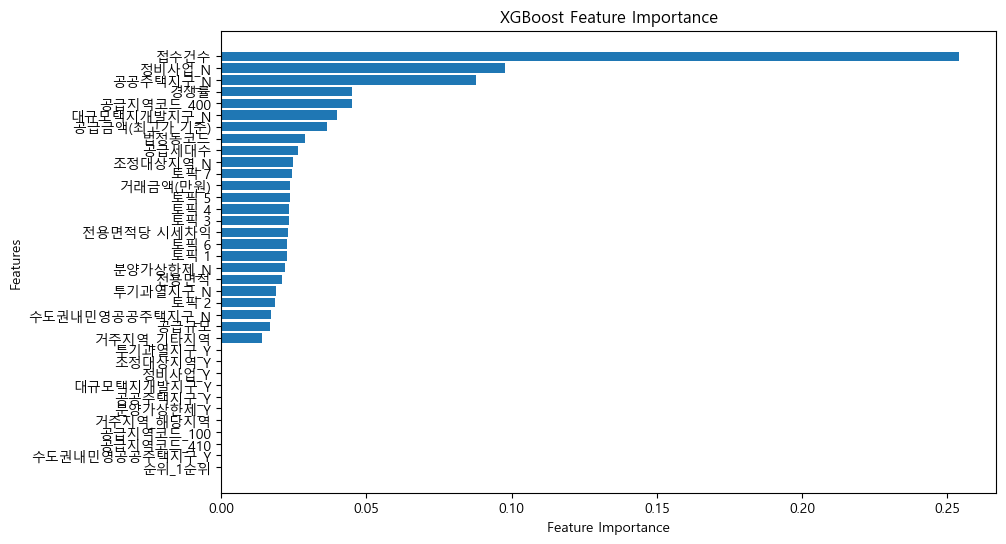

In [21]:
import matplotlib.pyplot as plt
import xgboost as xgb
import pandas as pd
# 중요 변수 추출 (수정됨)
feature_importance = xgb_grid_search.best_estimator_.feature_importances_
# 변수명과 중요도를 데이터프레임으로 저장 (수정됨)
feature_df = pd.DataFrame({'Feature': X_train_transformed.columns, 'Importance': feature_importance})
feature_df = feature_df.sort_values(by='Importance', ascending=False)
# 시각화
plt.figure(figsize=(10, 6))
plt.barh(feature_df['Feature'], feature_df['Importance'])
plt.gca().invert_yaxis()
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("XGBoost Feature Importance")
plt.show()


In [24]:
X_train_transformed.drop(['순위_1순위', '수도권내민영공공주택지구_Y', '공급지역코드_410', '공급지역코드_100', '거주지역_해당지역', '분양가상한제_Y', '공공주택지구_Y', '대규모택지개발지구_Y', '정비사업_Y', '조정대상지역_Y', '투기과열지구_Y'], axis=1, inplace=True)
X_test_transformed.drop(['순위_1순위', '수도권내민영공공주택지구_Y', '공급지역코드_410', '공급지역코드_100', '거주지역_해당지역', '분양가상한제_Y', '공공주택지구_Y', '대규모택지개발지구_Y', '정비사업_Y', '조정대상지역_Y', '투기과열지구_Y'], axis=1, inplace=True)


In [25]:
# XGBoost 모델 생성
xgb_model = xgb.XGBRegressor(objective='reg:squarederror')

# Grid Search 파라미터 설정
xgb_param_grid = {
    'n_estimators': [1000],
    'max_depth': [5],
    'learning_rate': [0.01],
    'subsample': [0.8],
    'colsample_bytree': [1.0],
}

# Grid Search 수행
xgb_grid_search = GridSearchCV(xgb_model, xgb_param_grid, cv=5)
xgb_grid_search.fit(X_train_transformed, y_train)

# 최적 모델 예측
y_pred_xgb = xgb_grid_search.predict(X_test_transformed)

# RMSE와 R^2 계산 함수
def evaluate_model(y_true, y_pred):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    return rmse, r2

# 결과 출력
rmse_xgb, r2_xgb = evaluate_model(y_test, y_pred_xgb)
print(f"XGBoost - RMSE: {rmse_xgb}, R^2: {r2_xgb}")

XGBoost - RMSE: 5.9826430126398655, R^2: 0.6713189383607938


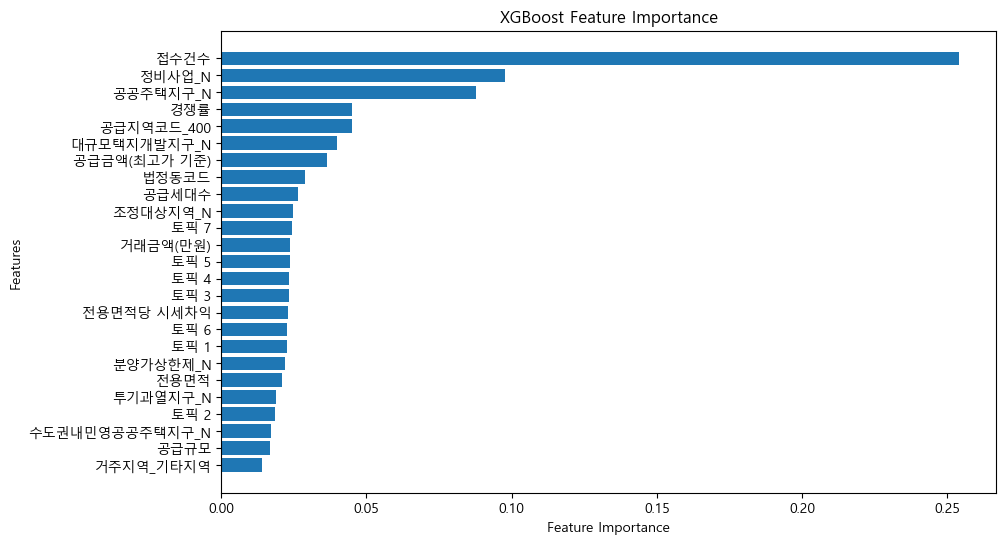

In [26]:
import matplotlib.pyplot as plt
import xgboost as xgb
import pandas as pd
# 중요 변수 추출 (수정됨)
feature_importance = xgb_grid_search.best_estimator_.feature_importances_
# 변수명과 중요도를 데이터프레임으로 저장 (수정됨)
feature_df = pd.DataFrame({'Feature': X_train_transformed.columns, 'Importance': feature_importance})
feature_df = feature_df.sort_values(by='Importance', ascending=False)
# 시각화
plt.figure(figsize=(10, 6))
plt.barh(feature_df['Feature'], feature_df['Importance'])
plt.gca().invert_yaxis()
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("XGBoost Feature Importance")
plt.show()



In [28]:
X_train_transformed.drop(['순위_1순위', '수도권내민영공공주택지구_Y', '공급지역코드_410', '공급지역코드_100', '거주지역_해당지역', '분양가상한제_Y', '공공주택지구_Y', '대규모택지개발지구_Y', '정비사업_Y', '조정대상지역_Y', '투기과열지구_Y','거주지역_기타지역', '공급규모', '수도권내민영공공주택지구_N', '토픽 2', '투기과열지구_N'], axis=1, inplace=True)
X_test_transformed.drop(['순위_1순위', '수도권내민영공공주택지구_Y', '공급지역코드_410', '공급지역코드_100', '거주지역_해당지역', '분양가상한제_Y', '공공주택지구_Y', '대규모택지개발지구_Y', '정비사업_Y', '조정대상지역_Y', '투기과열지구_Y','거주지역_기타지역', '공급규모', '수도권내민영공공주택지구_N', '토픽 2', '투기과열지구_N'], axis=1, inplace=True)


In [29]:
# XGBoost 모델 생성
xgb_model = xgb.XGBRegressor(objective='reg:squarederror')

# Grid Search 파라미터 설정
xgb_param_grid = {
    'n_estimators': [1000],
    'max_depth': [5],
    'learning_rate': [0.01],
    'subsample': [0.8],
    'colsample_bytree': [1.0],
}

# Grid Search 수행
xgb_grid_search = GridSearchCV(xgb_model, xgb_param_grid, cv=5)
xgb_grid_search.fit(X_train_transformed, y_train)

# 최적 모델 예측
y_pred_xgb = xgb_grid_search.predict(X_test_transformed)

# RMSE와 R^2 계산 함수
def evaluate_model(y_true, y_pred):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    return rmse, r2

# 결과 출력
rmse_xgb, r2_xgb = evaluate_model(y_test, y_pred_xgb)
print(f"XGBoost - RMSE: {rmse_xgb}, R^2: {r2_xgb}")

XGBoost - RMSE: 6.023162624940148, R^2: 0.6668516386261614


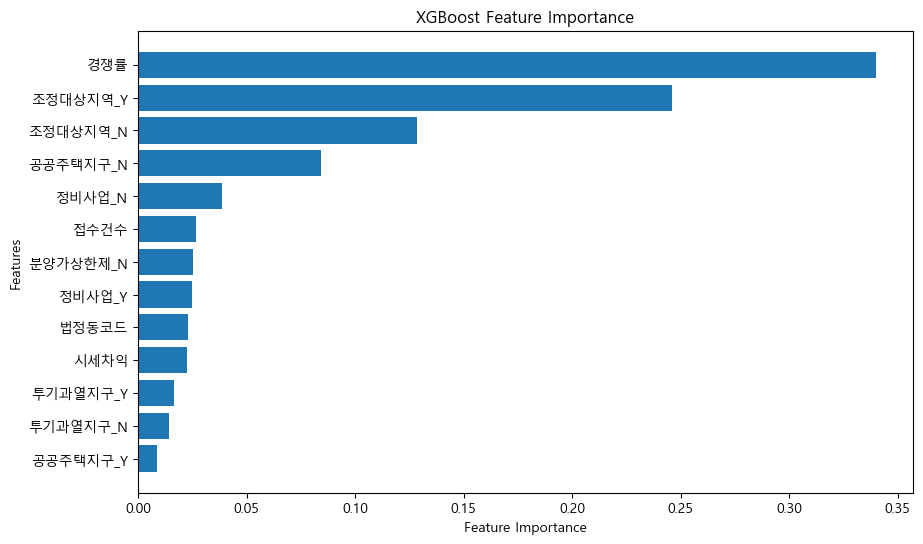

Best Parameters: {'colsample_bytree': 0.9, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 500, 'subsample': 0.8}


In [ ]:
import matplotlib.pyplot as plt
import xgboost as xgb
import pandas as pd
# 중요 변수 추출 (수정됨)
feature_importance = xgb_grid_search.best_estimator_.feature_importances_
# 변수명과 중요도를 데이터프레임으로 저장 (수정됨)
feature_df = pd.DataFrame({'Feature': X_train_transformed.columns, 'Importance': feature_importance})
feature_df = feature_df.sort_values(by='Importance', ascending=False)
# 시각화
plt.figure(figsize=(10, 6))
plt.barh(feature_df['Feature'], feature_df['Importance'])
plt.gca().invert_yaxis()
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("XGBoost Feature Importance")
plt.show()



### LightGBM

In [3]:
from sklearn.model_selection import GridSearchCV

# 전처리된 데이터 가져오기
df = pd.read_csv("./storage/train_data/train-시세차익있는최종트레인3.csv", encoding = 'cp949')

X = df.drop(columns=["최고당첨가점"])
Y = df["최고당첨가점"]

X_train, X_test, y_train, y_test = train_test_split(
    X,  # 타겟(최고당첨가점) 제외
    Y,  # 타겟
    test_size=0.2,
    random_state=42
)

feature_pipeline = pipeline2()

# 학습 데이터(X_train)에 fit
feature_pipeline.fit(X_train)

# 학습 데이터(X_train)를 변환
X_train_transformed = feature_pipeline.transform(X_train)

# 테스트 데이터(X_test)를 변환
X_test_transformed = feature_pipeline.transform(X_test)



Index(['공급지역코드', '공급규모', '투기과열지구', '조정대상지역', '분양가상한제', '정비사업', '공공주택지구',
       '대규모택지개발지구', '수도권내민영공공주택지구', '공급세대수', '순위', '거주지역', '접수건수', '경쟁률',
       '토픽 1', '토픽 2', '토픽 3', '토픽 4', '토픽 5', '토픽 6', '토픽 7', '전용면적',
       '공급금액(최고가 기준)', '법정동코드', '거래금액(만원)', '전용면적당 시세차익'],
      dtype='object')
Index(['공급규모', '공급세대수', '접수건수', '경쟁률', '토픽 1', '토픽 2', '토픽 3', '토픽 4', '토픽 5',
       '토픽 6', '토픽 7', '전용면적', '공급금액(최고가 기준)', '법정동코드', '거래금액(만원)',
       '전용면적당 시세차익', '투기과열지구_N', '투기과열지구_Y', '조정대상지역_N', '조정대상지역_Y',
       '분양가상한제_N', '분양가상한제_Y', '정비사업_N', '정비사업_Y', '공공주택지구_N', '공공주택지구_Y',
       '대규모택지개발지구_N', '대규모택지개발지구_Y', '거주지역_기타지역', '거주지역_해당지역', '공급지역코드_100',
       '공급지역코드_400', '공급지역코드_410', '수도권내민영공공주택지구_N', '수도권내민영공공주택지구_Y',
       '순위_1순위'],
      dtype='object')
⚠️ Warning: 새로운 법정동코드 발견 {'4137012200.0', '4111514000.0', '4125010300.0', '4148025327.0', '4139012700.0', '1156011000.0', '4143011000.0'}. 'unknown'으로 대체합니다.
Index(['공급지역코드', '공급규모', '투기과열지구', '조정대상지역', '분양가상한제', '정비사업', '

/opt/anaconda3/envs/Jooan_Lee/lib/python3.11/site-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(
/opt/anaconda3/envs/Jooan_Lee/lib/python3.11/site-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


In [5]:
import lightgbm as lgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# LightGBM 모델 생성
lgb_model = lgb.LGBMRegressor(verbose=-1)

# Grid Search 파라미터 설정
lgb_param_grid = {
    'n_estimators': [100, 500, 1000],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 0.9],
    'colsample_bytree': [0.8, 0.9],
    'num_leaves': [15, 31],
}


# Grid Search 수행
lgb_grid_search = GridSearchCV(lgb_model, lgb_param_grid, cv=5)
lgb_grid_search.fit(X_train_transformed, y_train)

# 최적 모델 예측
y_pred_lgb = lgb_grid_search.predict(X_test_transformed)

# RMSE와 R^2 계산 함수
def evaluate_model(y_true, y_pred):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    return rmse, r2

# 결과 출력
rmse_lgb, r2_lgb = evaluate_model(y_test, y_pred_lgb)
print(f"LightGBM - RMSE: {rmse_lgb}, R^2: {r2_lgb}")

# 최적의 파라미터 출력
print("Best parameters:")
for param, value in lgb_grid_search.best_params_.items():
    print(f"{param}: {value}")


LightGBM - RMSE: 6.013005960012438, R^2: 0.6679742459991012
Best parameters:
colsample_bytree: 0.8
learning_rate: 0.01
max_depth: 5
n_estimators: 1000
num_leaves: 15
subsample: 0.8


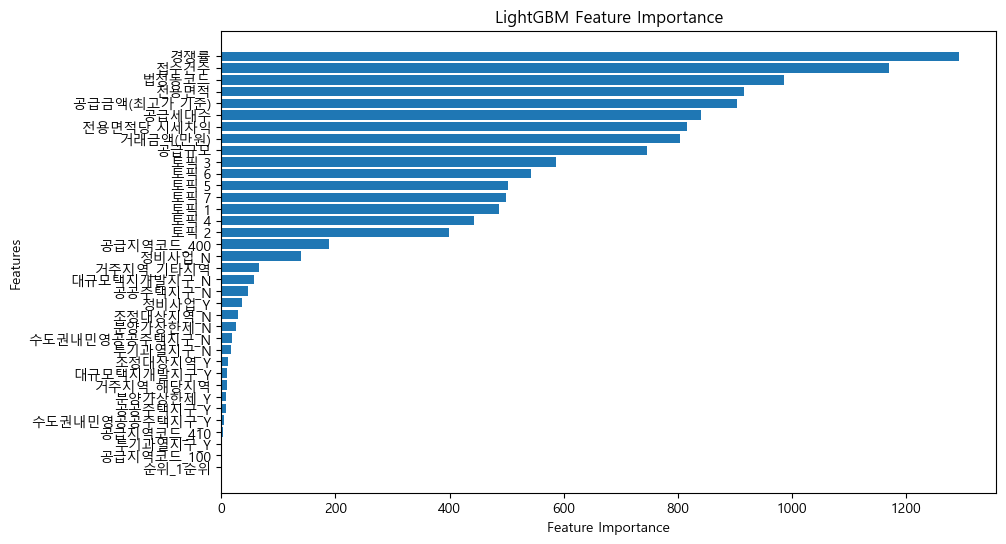

In [6]:
# Feature Importance 시각화
feature_importance = lgb_grid_search.best_estimator_.feature_importances_

feature_df = pd.DataFrame({'Feature': X_train_transformed.columns, 'Importance': feature_importance})
feature_df = feature_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(feature_df['Feature'], feature_df['Importance'])
plt.gca().invert_yaxis()
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("LightGBM Feature Importance")
plt.show()

In [9]:
X_train_transformed.drop(['순위_1순위', '공급지역코드_100', '투기과열지구_Y', '공급지역코드_410', '수도권내민영공공주택지구_Y', '공공주택지구_Y', '분양가상한제_Y'], axis=1, inplace=True)
X_test_transformed.drop(['순위_1순위', '공급지역코드_100', '투기과열지구_Y', '공급지역코드_410', '수도권내민영공공주택지구_Y', '공공주택지구_Y', '분양가상한제_Y'], axis=1, inplace=True)


In [10]:
import lightgbm as lgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# LightGBM 모델 생성
lgb_model = lgb.LGBMRegressor(verbose=-1)

# Grid Search 파라미터 설정
lgb_param_grid = {
    'n_estimators': [1000],
    'max_depth': [5],
    'learning_rate': [0.01],
    'subsample': [0.8],
    'colsample_bytree': [0.8],
    'num_leaves': [15],
}



# Grid Search 수행
lgb_grid_search = GridSearchCV(lgb_model, lgb_param_grid, cv=5)
lgb_grid_search.fit(X_train_transformed, y_train)

# 최적 모델 예측
y_pred_lgb = lgb_grid_search.predict(X_test_transformed)

# RMSE와 R^2 계산 함수
def evaluate_model(y_true, y_pred):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    return rmse, r2

# 결과 출력
rmse_lgb, r2_lgb = evaluate_model(y_test, y_pred_lgb)
print(f"LightGBM - RMSE: {rmse_lgb}, R^2: {r2_lgb}")

LightGBM - RMSE: 6.0284145953216335, R^2: 0.6662703997437519


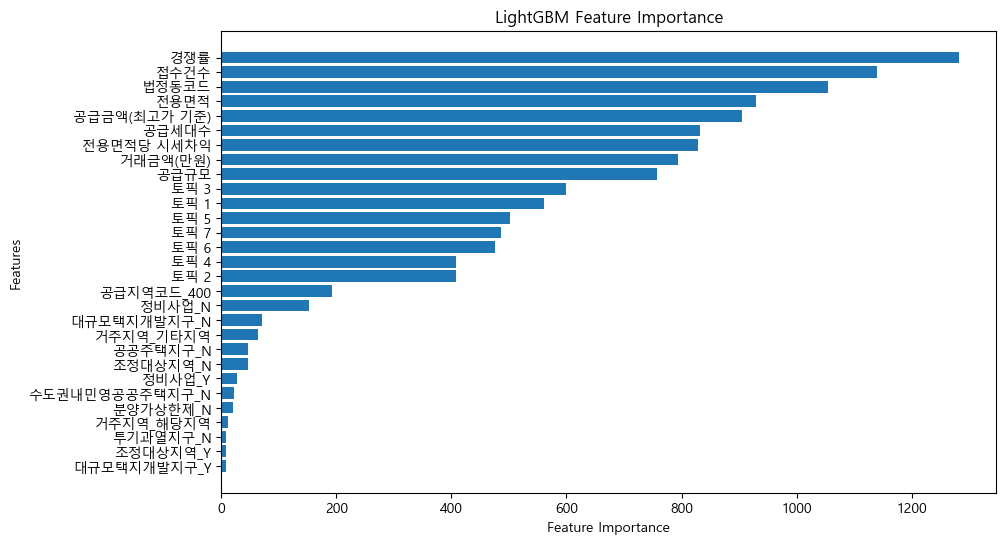

In [11]:
# Feature Importance 시각화
feature_importance = lgb_grid_search.best_estimator_.feature_importances_

feature_df = pd.DataFrame({'Feature': X_train_transformed.columns, 'Importance': feature_importance})
feature_df = feature_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(feature_df['Feature'], feature_df['Importance'])
plt.gca().invert_yaxis()
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("LightGBM Feature Importance")
plt.show()

In [13]:
X_train_transformed.drop(['순위_1순위', '공급지역코드_100', '투기과열지구_Y', '공급지역코드_410', '수도권내민영공공주택지구_Y', '공공주택지구_Y', '분양가상한제_Y', '대규모택지개발지구_Y', '조정대상지역_Y', '투기과열지구_N', '거주지역_해당지역', '분양가상한제_N', '수도권내민영공공주택지구_N', '정비사업_Y'], axis=1, inplace=True)
X_test_transformed.drop(['순위_1순위', '공급지역코드_100', '투기과열지구_Y', '공급지역코드_410', '수도권내민영공공주택지구_Y', '공공주택지구_Y', '분양가상한제_Y', '대규모택지개발지구_Y', '조정대상지역_Y', '투기과열지구_N', '거주지역_해당지역', '분양가상한제_N', '수도권내민영공공주택지구_N', '정비사업_Y'], axis=1, inplace=True)


In [14]:
import lightgbm as lgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# LightGBM 모델 생성
lgb_model = lgb.LGBMRegressor(verbose=-1)

# Grid Search 파라미터 설정
lgb_param_grid = {
    'n_estimators': [1000],
    'max_depth': [5],
    'learning_rate': [0.01],
    'subsample': [0.8],
    'colsample_bytree': [0.8],
    'num_leaves': [15],
}

# Grid Search 수행
lgb_grid_search = GridSearchCV(lgb_model, lgb_param_grid, cv=5)
lgb_grid_search.fit(X_train_transformed, y_train)

# 최적 모델 예측
y_pred_lgb = lgb_grid_search.predict(X_test_transformed)

# RMSE와 R^2 계산 함수
def evaluate_model(y_true, y_pred):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    return rmse, r2

# 결과 출력
rmse_lgb, r2_lgb = evaluate_model(y_test, y_pred_lgb)
print(f"LightGBM - RMSE: {rmse_lgb}, R^2: {r2_lgb}")

LightGBM - RMSE: 6.000361568962453, R^2: 0.66936917205153


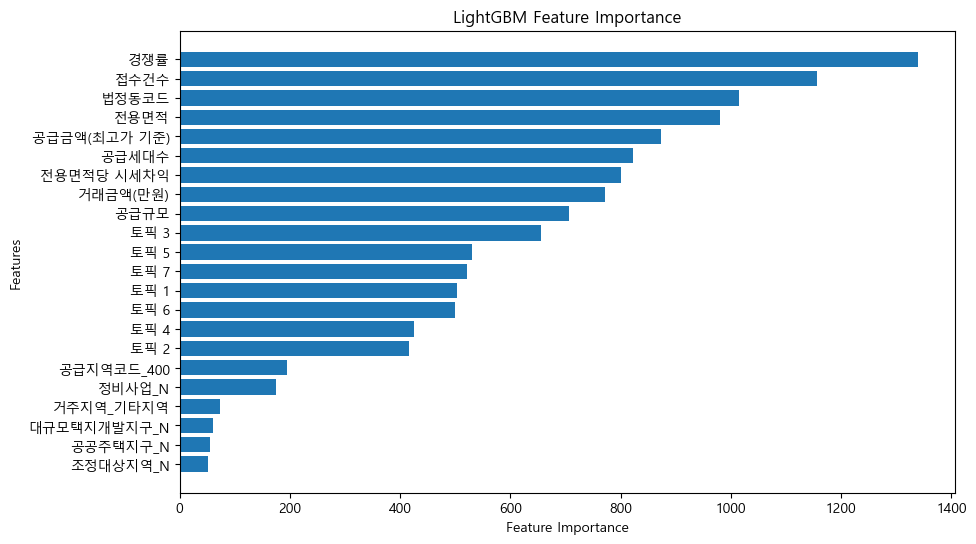

In [15]:
# Feature Importance 시각화
feature_importance = lgb_grid_search.best_estimator_.feature_importances_

feature_df = pd.DataFrame({'Feature': X_train_transformed.columns, 'Importance': feature_importance})
feature_df = feature_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(feature_df['Feature'], feature_df['Importance'])
plt.gca().invert_yaxis()
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("LightGBM Feature Importance")
plt.show()

### 이 아래로는 kfolod 써서 처음에 시도한 코드

각 Fold의 RMSE: [5.87759509570153, 5.347221363500163, 6.047203487643223, 5.517817414039273, 5.25831935878676]
평균 RMSE: 5.609631343934189
Feature Importance (평균):
공급규모: 0.0087
공급세대수: 0.0131
접수건수: 0.0098
경쟁률: 0.7987
토픽 1: 0.0073
토픽 2: 0.0077
토픽 3: 0.0070
토픽 4: 0.0110
토픽 5: 0.0086
토픽 6: 0.0085
토픽 7: 0.0076
전용면적: 0.0123
공급금액(최고가 기준): 0.0205
법정동코드: 0.0075
거래금액(만원): 0.0188
전용면적당 시세차익: 0.0152
투기과열지구_N: 0.0006
투기과열지구_Y: 0.0006
조정대상지역_N: 0.0146
조정대상지역_Y: 0.0140
분양가상한제_N: 0.0004
분양가상한제_Y: 0.0005
정비사업_N: 0.0009
정비사업_Y: 0.0009
공공주택지구_N: 0.0004
공공주택지구_Y: 0.0004
대규모택지개발지구_N: 0.0004
대규모택지개발지구_Y: 0.0004
수도권내민영공공주택지구_N: 0.0001
수도권내민영공공주택지구_Y: 0.0002
순위_1순위: 0.0000
거주지역_기타지역: 0.0003
거주지역_해당지역: 0.0003
공급지역코드_100: 0.0003
공급지역코드_400: 0.0018
공급지역코드_410: 0.0004


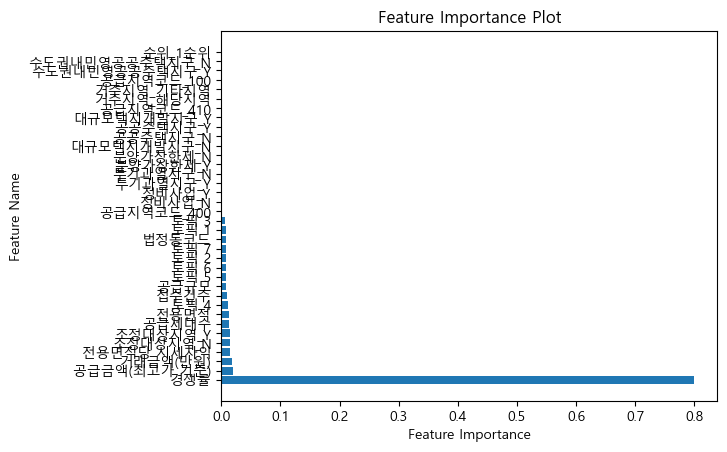

In [ ]:
# from sklearn.model_selection import KFold
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.metrics import mean_absolute_error, mean_squared_error, root_mean_squared_error
# import numpy as np

# # 1. 랜덤포레스트 모델 고정
# model = RandomForestRegressor(
#     n_estimators=100,
#     max_depth=None,
#     random_state=42
# )

# # 2. K-Fold 교차 검증 설정 (5개 폴드로 나누기)
# kf = KFold(n_splits=5, shuffle=True, random_state=42)

# #  3. MAE, RMSE 저장할 리스트
# mae_scores = []
# rmse_scores = []
# feature_importances = []

# # 4. K-Fold 반복문 (5번 반복)
# for train_index, test_index in kf.split(X_train_transformed):
#     X_tr, X_val = X_train_transformed.iloc[train_index], X_train_transformed.iloc[test_index]
#     y_tr, y_val = y_train.iloc[train_index], y_train.iloc[test_index]

#     # 5. 모델 훈련
#     model.fit(X_tr, y_tr)
    
#     # 6. 예측값 뽑기
#     y_pred = model.predict(X_val)
    
#     # 7. MAE & RMSE 계산
#     mae = mean_absolute_error(y_val, y_pred)
#     rmse = root_mean_squared_error(y_val, y_pred)
    
#     # 8. 결과 저장
#     mae_scores.append(mae)
#     rmse_scores.append(rmse)
    
#     # 9. Feature Importance 저장
#     feature_importances.append(model.feature_importances_)

# #  10. 결과 출력
# print(f"각 Fold의 RMSE: {rmse_scores}")
# print(f"평균 RMSE: {np.mean(rmse_scores)}")


# # Feature Importance 평균 계산 및 출력
# avg_feature_importances = np.mean(feature_importances, axis=0)
# print("Feature Importance (평균):")
# for i, col in enumerate(X_train_transformed.columns):
#     print(f"{col}: {avg_feature_importances[i]:.4f}")

# # Feature Importance 시각화
# import matplotlib.pyplot as plt

# sorted_idx = np.argsort(avg_feature_importances)[::-1]
# plt.barh(X_train_transformed.columns[sorted_idx], avg_feature_importances[sorted_idx])
# plt.xlabel("Feature Importance")
# plt.ylabel("Feature Name")
# plt.title("Feature Importance Plot")
# plt.show()


In [ ]:
import lightgbm as lgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# LightGBM 모델 생성
lgb_model = lgb.LGBMRegressor(verbose=-1, colsample_bytree=0.8, learning_rate=0.01, max_depth=5, n_estimators=1000, num_leaves=15, subsample=0.8)
lgb_model.fit(X_train_transformed, y_train)

# 최적 모델 예측
y_pred_lgb = lgb_model.predict(X_test_transformed)

# RMSE와 R^2 계산 함수
def evaluate_model(y_true, y_pred):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    return rmse, r2

# 결과 출력
rmse_lgb, r2_lgb = evaluate_model(y_test, y_pred_lgb)
print(f"LightGBM - RMSE: {rmse_lgb}, R^2: {r2_lgb}")

LightGBM - RMSE: 6.013005960012438, R^2: 0.6679742459991012


### 모델 저장 

In [8]:
# 모델 저장 및 로드

version = 'xgb_highest_0.0.2'

# 모델 저장
joblib.dump(xgb_model, f"./storage/trained_model/model_{version}.pkl")

['./storage/trained_model/model_xgb_highest_0.0.2.pkl']

In [8]:
# 모델 로드
loaded_model = joblib.load("./storage/trained_model/model_0.0.1.pkl")

# 예측
# X_test = np.array([[1, 2]])
# prediction = loaded_model.predict(X_test)
# print("Prediction:", prediction)